In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [2]:
# Step 1: Preprocess the dataset
data_dir = "Ravdess_specs_proc_new/"
emotions_to_consider = ["happy", "sad", "angry", "fearful"]

# Load images and labels
images = []
labels = []

In [3]:
for emotion in emotions_to_consider:
    emotion_dir = os.path.join(data_dir, emotion)
    for img_name in os.listdir(emotion_dir):
        img = load_img(os.path.join(emotion_dir, img_name), target_size=(224, 224))
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(emotion)

In [4]:
# Convert to numpy arrays and normalize
images = np.array(images) / 255.0
labels = np.array(labels)

# Encode labels
label_to_index = {label: idx for idx, label in enumerate(emotions_to_consider)}
index_to_label = {idx: label for label, idx in label_to_index.items()}
labels = np.array([label_to_index[label] for label in labels])

In [5]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



In [6]:
# Step 2: Build the VGGNet model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [8]:
# Step 3: Train the model
# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

batch_size = 32
epochs = 50

In [9]:
# Train the model
checkpoint = ModelCheckpoint("V:/modelVGG_Rav_procN.h5", save_best_only=True, monitor='val_loss', mode='min')
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    callbacks=[checkpoint]
)

Epoch 1/50
19/19 [==============================] - 258s 13s/step - loss: 1.3857 - accuracy: 0.2560 - val_loss: 1.3969 - val_accuracy: 0.2338
Epoch 2/50
19/19 [==============================] - 245s 13s/step - loss: 1.3875 - accuracy: 0.2543 - val_loss: 1.3871 - val_accuracy: 0.2338
Epoch 3/50
19/19 [==============================] - 247s 13s/step - loss: 1.3846 - accuracy: 0.2543 - val_loss: 1.3854 - val_accuracy: 0.2338
Epoch 4/50
19/19 [==============================] - 242s 13s/step - loss: 1.3843 - accuracy: 0.2526 - val_loss: 1.3829 - val_accuracy: 0.2792
Epoch 5/50
19/19 [==============================] - 248s 13s/step - loss: 1.3760 - accuracy: 0.3041 - val_loss: 1.3796 - val_accuracy: 0.2273
Epoch 6/50
19/19 [==============================] - 241s 13s/step - loss: 1.3487 - accuracy: 0.3385 - val_loss: 1.3428 - val_accuracy: 0.3442
Epoch 7/50
19/19 [==============================] - 216s 11s/step - loss: 1.2751 - accuracy: 0.3918 - val_loss: 1.2432 - val_accuracy: 0.3766
Epoch 

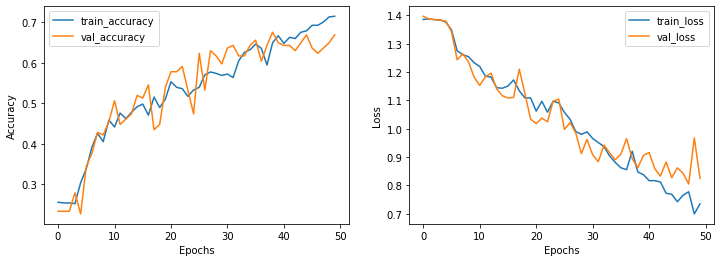

In [10]:
# Step 4: Evaluate the model
# Plot the accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
# Evaluate the best model on the test set
model.load_weights("V:/modelVGG_Rav_procN.h5")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")
print(f"Test loss: {test_loss:.2f}")

5/5 [==============================] - 9s 2s/step - loss: 0.8048 - accuracy: 0.6364
Test accuracy: 0.64
Test loss: 0.80


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Get the predicted labels
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate per-emotion accuracy and other metrics
report = classification_report(y_test, y_pred_labels, target_names=emotions_to_consider, digits=2)
print("\nClassification Report:")
print(report)

5/5 [==============================] - 9s 2s/step
Confusion Matrix:
[[21  5  4  5]
 [12 22  2  9]
 [ 6  2 27  1]
 [ 3  5  2 28]]

Classification Report:
              precision    recall  f1-score   support

       happy       0.50      0.60      0.55        35
         sad       0.65      0.49      0.56        45
       angry       0.77      0.75      0.76        36
     fearful       0.65      0.74      0.69        38

    accuracy                           0.64       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.64      0.64      0.64       154



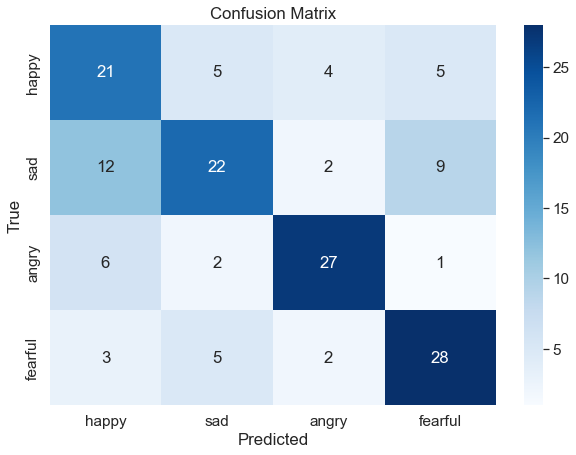

In [13]:
import seaborn as sns

# Create a colorful confusion matrix with labels
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # Set font scale for better readability
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=emotions_to_consider, yticklabels=emotions_to_consider)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()